In [21]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
mat = scipy.io.loadmat('69dataset.mat')
I = mat['X']
Y = mat['Y']
X_prior = mat['prior']

In [23]:
Inorm = ((I.transpose() - np.mean(I, axis=1))/np.std(I, axis=1)).transpose()

In [24]:
Ynorm = ((Y.transpose() - np.mean(Y, axis=1))/np.std(Y, axis=1)).transpose()

In [25]:
X_train = np.concatenate([Inorm[0:40,:],Inorm[50:90,:]])
X_test = np.concatenate([Inorm[40:50,:],Inorm[90:100,:]])
Y_train = np.concatenate([Ynorm[0:40,:],Ynorm[50:90,:]])
Y_test = np.concatenate([Ynorm[40:50,:],Ynorm[90:100,:]])

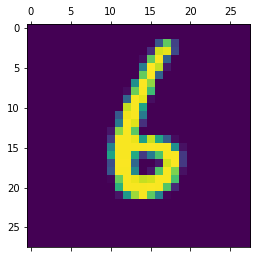

In [26]:
plt.matshow(np.reshape(I[4],(28,28)).transpose())

plt.show()

In [27]:
l = 10^-6
q = np.shape(Y_train)[1]
B = np.matmul(np.matmul(np.linalg.inv(np.matmul(Y_train.transpose(), Y_train) + l * np.identity(q)), Y_train.transpose()), X_train)

In [28]:
print np.shape(B)
print np.shape(X_test)
print np.shape(Y_test)
print np.shape(X_prior)

(3092, 784)
(20, 784)
(20, 3092)
(2000, 784)


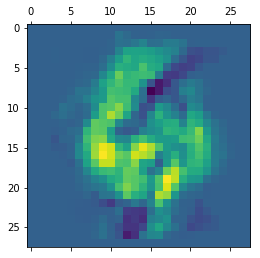

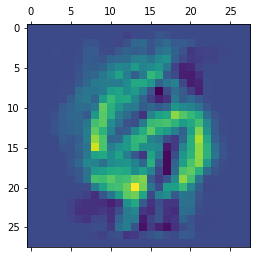

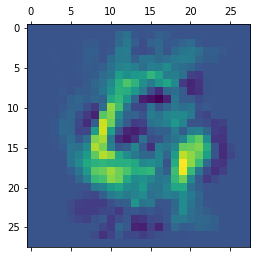

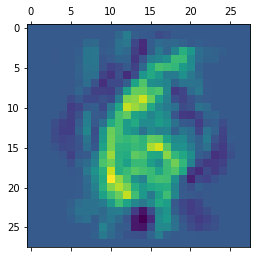

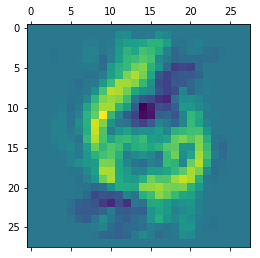

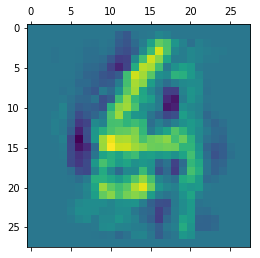

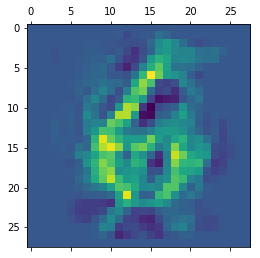

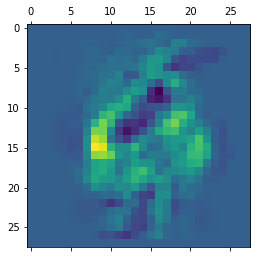

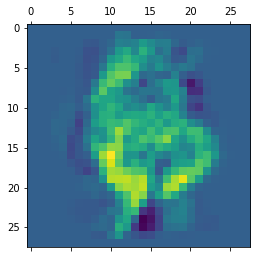

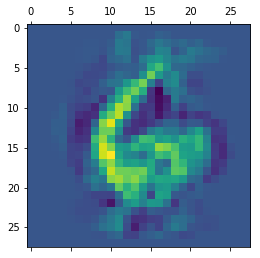

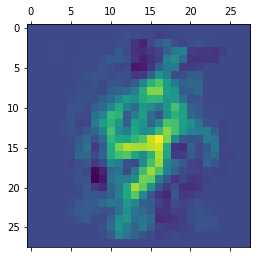

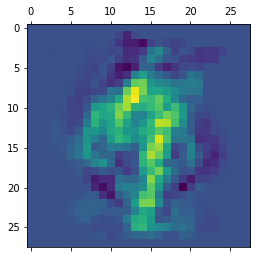

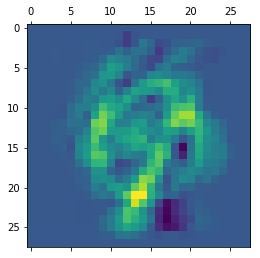

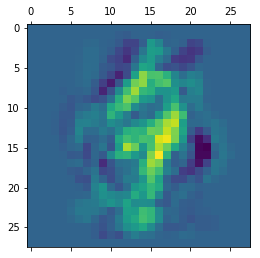

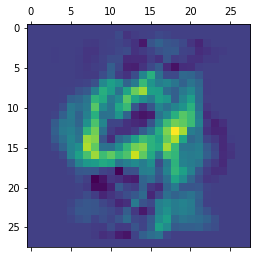

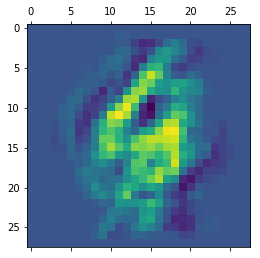

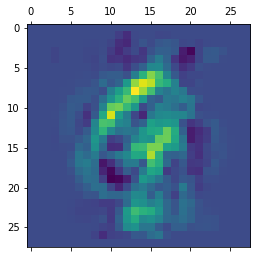

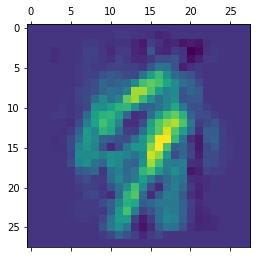

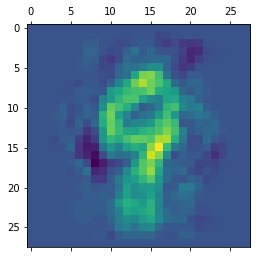

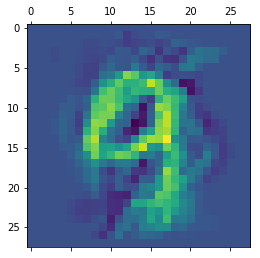

In [29]:
for i in range(20):
    x= np.matmul(np.transpose(B),Y_test[i,:])
    plt.matshow(np.reshape((x),(28,28)).transpose())
    plt.show()

In [30]:
l= 10^-6
p = np.shape(X_train)[1]
B_g = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(), X_train) + l * np.identity(p)), X_train.transpose()), Y_train)

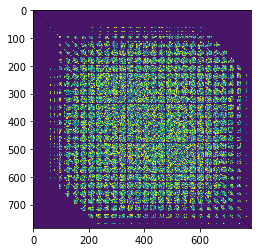

In [31]:
n = np.shape(X_prior)[0]
sigma_l = (10^-3)*np.identity(q)
sigma_p = (np.matmul(X_prior.transpose(),X_prior) + l * np.identity(p)) / (n-1)
#sigma_p = (np.matmul(X_prior.transpose(),X_prior)) / (n-1)
plt.imshow(sigma_p)
plt.show()

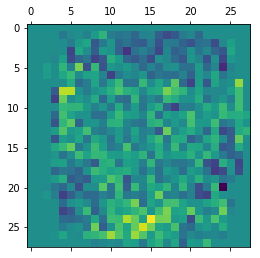

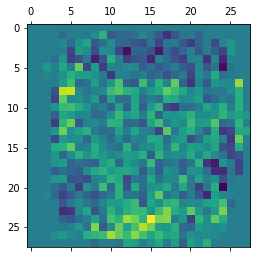

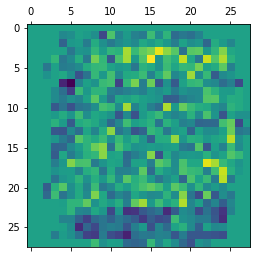

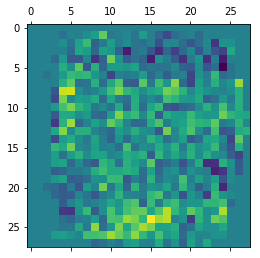

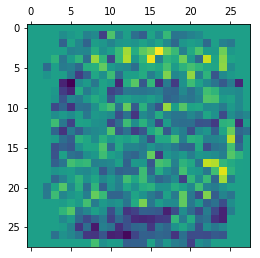

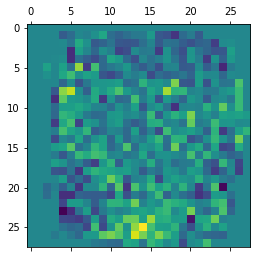

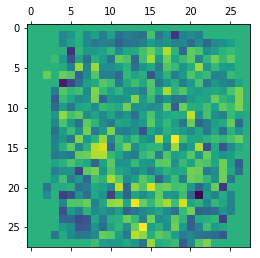

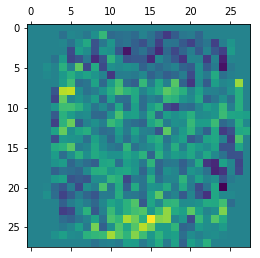

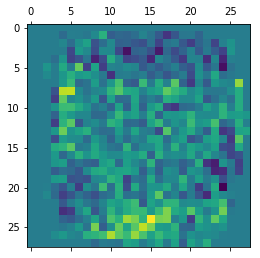

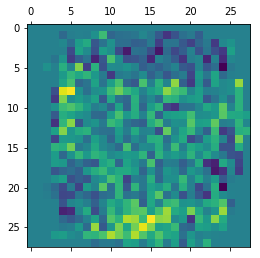

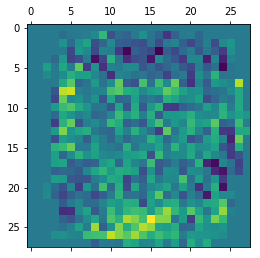

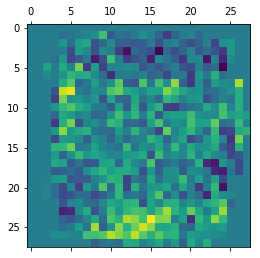

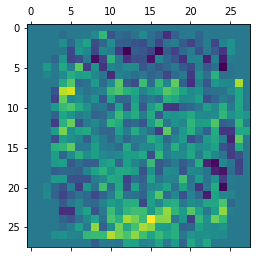

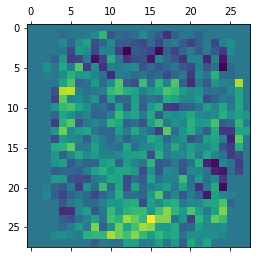

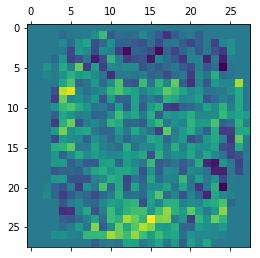

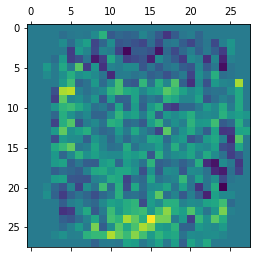

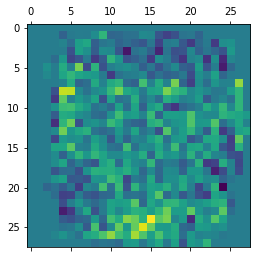

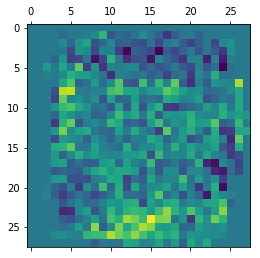

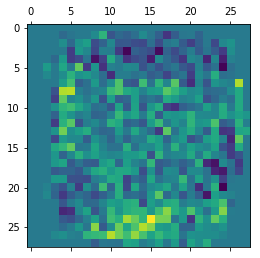

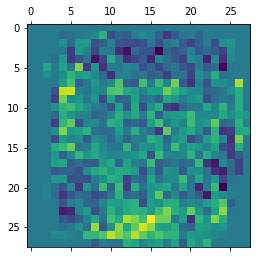

In [32]:
for i in range(20):
    mu = np.matmul(np.matmul(np.matmul(np.linalg.inv(np.linalg.inv(sigma_p)+np.matmul(np.matmul(B_g,np.linalg.inv(sigma_l)),B_g.transpose())),B_g),np.linalg.inv(sigma_l)),Y_test[i,:])
    x_g = mu
    plt.matshow(np.reshape((x_g),(28,28)).transpose())
    plt.show()